## Assign Environment

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


## Import Relative Function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Load IMDB Data 

In [3]:
from keras.datasets import imdb # IMDB 情緒分析庫
max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Using TensorFlow backend.
/anaconda3/envs/NCTS/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [4]:
print('train_data:',len(x_train))
print('test_data:',len(x_test))

train_data: 25000
test_data: 25000


## Preprocessing data : Define Every Sequence Length

In [5]:
from keras.preprocessing import sequence
maxlen = 500 #這裡查詢資料後選擇500
x_train = sequence.pad_sequences(x_train, maxlen)
x_test = sequence.pad_sequences(x_test, maxlen)

In [6]:
x_train.shape

(25000, 500)

## Build model

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
from keras.optimizers import Adadelta

## Add Dropout and EarlyStopping 

In [8]:
N = 500 # N維度
K = 128 # LSTM神經元數量
model = Sequential()
early_stopping = EarlyStopping(monitor='val_acc',verbose=2,mode='max',patience=1)
model.add(Embedding(max_features, N))
model.add(Dropout(0.2))
model.add(LSTM(K, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 500)         10000000  
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 500)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               322048    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 10,322,177
Trainable params: 10,322,177
Non-trainable params: 0
_________________________________________________________________


import pydot

from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_RNN.png')

## Visulaize model

<img src="model_RNN.png" alt="drawing" style="width: 128px;"/>

In [10]:
from keras.utils import plot_model
plot_model(model, show_layer_names=True, 
           show_shapes=True, 
           to_file='model_lmdb.png')

## Second Way To Visualize model

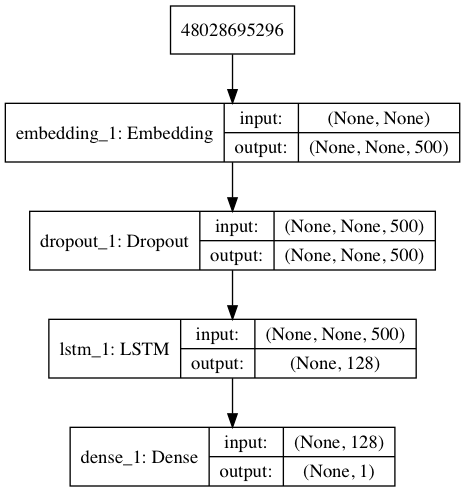

In [11]:
from IPython.display import Image
Image('model_lmdb.png')

## Compile Model

In [12]:
model.compile( loss='binary_crossentropy', optimizer=Adadelta(lr=0.5), metrics=['accuracy'])

#### 怕過擬和 所以epoch=2(其實是跑太久受不了)

In [14]:
model_1 = model.fit(x_train, y_train, batch_size=128, epochs=2, 
                    validation_data = (x_test, y_test), callbacks=[early_stopping])

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 936s 37ms/step - loss: 0.4008 - acc: 0.8258 - val_loss: 0.4312 - val_acc: 0.8050
Epoch 2/2
25000/25000 [==============================] - 936s 37ms/step - loss: 0.3610 - acc: 0.8535 - val_loss: 0.3622 - val_acc: 0.8431


## Show Result

In [26]:
score, acc = model.evaluate(x_test, y_test, batch_size=128)
print('Test_score:', score)
print('Test_accuracy:', acc)

25000/25000 [==============================] - 226s 9ms/step
Test_score: 0.3622257363986969
Test_accuracy: 0.8431200000190735


## Plot Accuracy and Error 

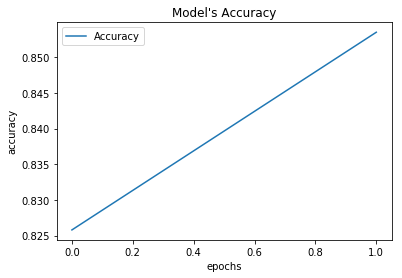

In [21]:
import matplotlib.pyplot as plt

plt.plot(model_1.history['acc'], label='Accuracy')

plt.title("Model's Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc="best")
plt.show()

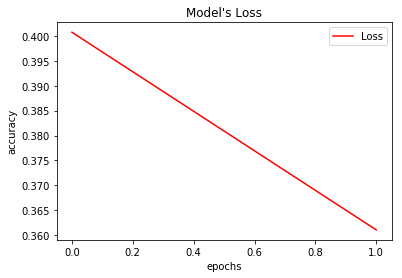

In [22]:
plt.plot(model_1.history['loss'], label='Loss', color="red")

plt.title("Model's Loss")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc="best")
plt.show()